In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore') 

In [2]:
medical_data = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
medical_data.shape

(100000, 9)

In [5]:
medical_data.head() 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
medical_data.tail() 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [7]:
print(medical_data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [8]:
medical_data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
medical_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


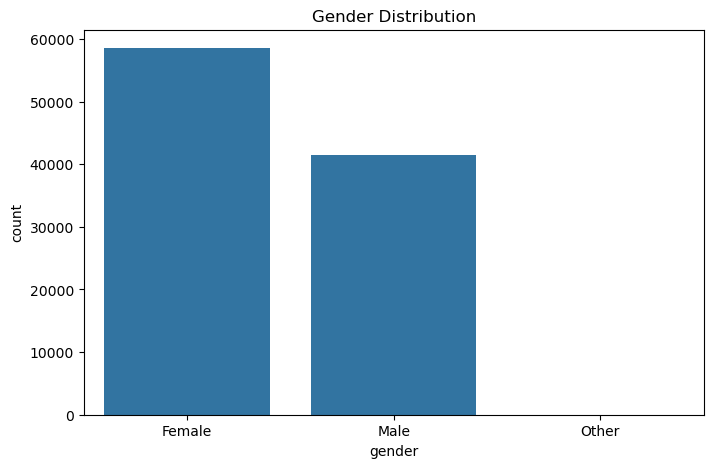

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=medical_data, x='gender')
plt.title('Gender Distribution')
plt.show()

In [11]:
medical_data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

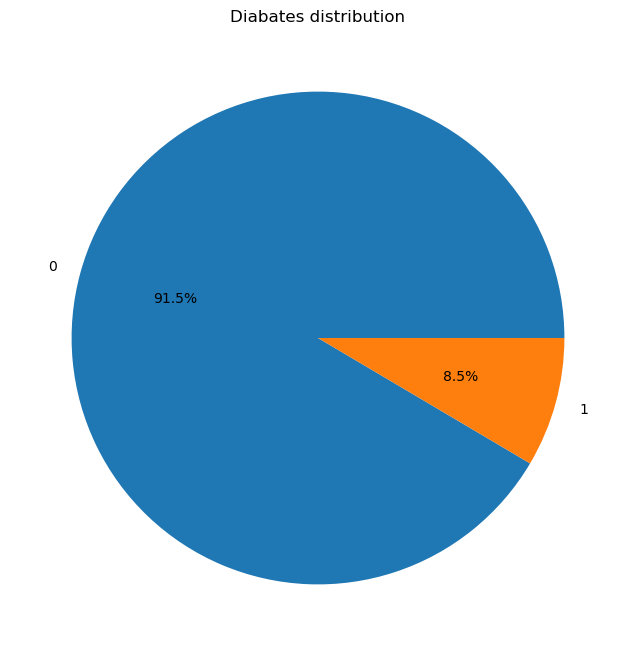

In [12]:
diabates_count = medical_data['diabetes'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(diabates_count, labels=diabates_count.index, autopct='%1.1f%%')
plt.title('Diabates distribution')
plt.show()

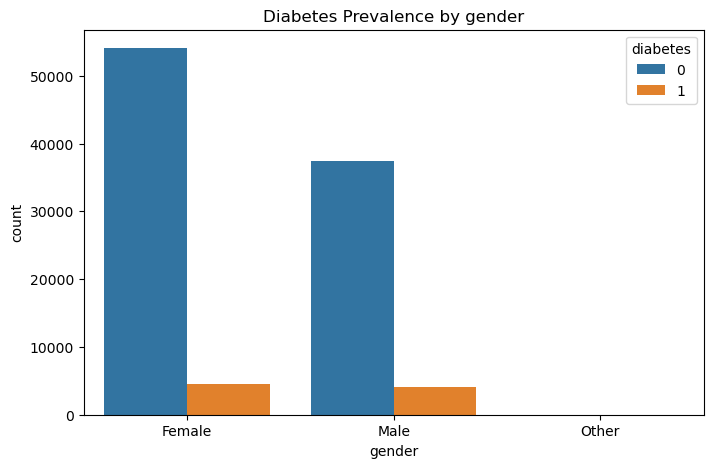

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=medical_data, x='gender', hue='diabetes')
plt.title('Diabetes Prevalence by gender')
plt.show()

In [14]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.svm import SVC

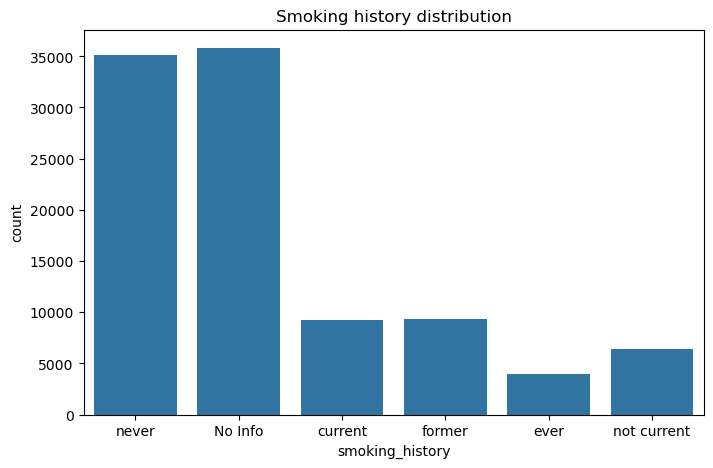

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=medical_data, x='smoking_history')
plt.title("Smoking history distribution")
plt.show()

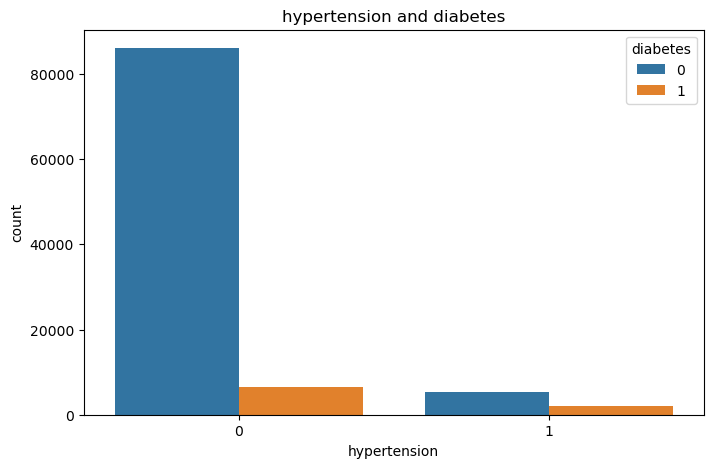

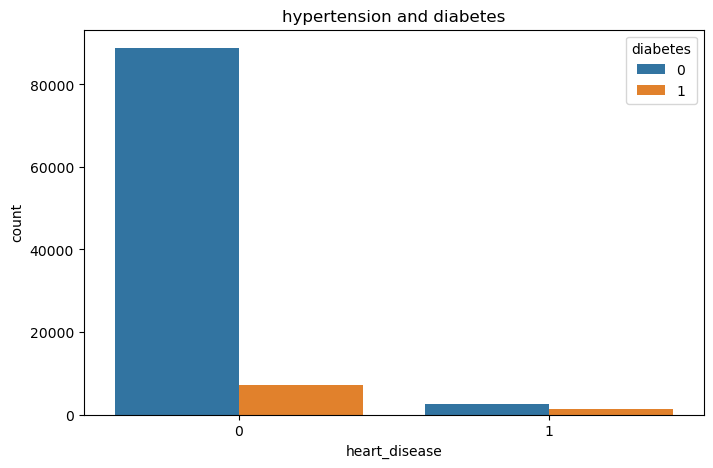

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=medical_data, x='hypertension', hue='diabetes')
plt.title("hypertension and diabetes")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=medical_data, x='heart_disease', hue='diabetes')
plt.title("hypertension and diabetes")
plt.show()

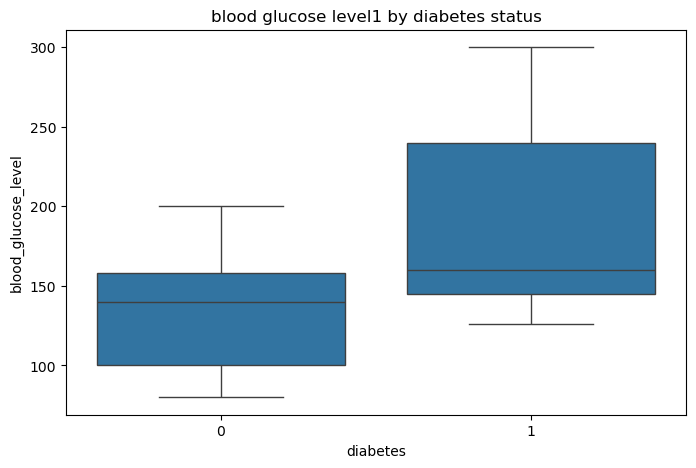

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=medical_data, x='diabetes', y='blood_glucose_level')
plt.title("blood glucose level1 by diabetes status")
plt.show()

In [18]:
medical_data['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

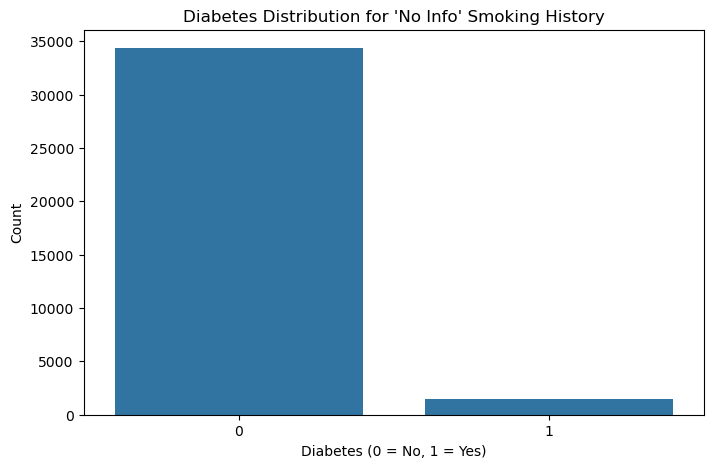

In [19]:
no_info_diabetes = medical_data[medical_data['smoking_history'] == "No Info"]
plt.figure(figsize=(8, 5))
sns.countplot(data=no_info_diabetes, x='diabetes')
plt.title("Diabetes Distribution for 'No Info' Smoking History")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [20]:
medical_data['smoking_history'] = medical_data['smoking_history'].map({
    'No Info': 0,
    'never': 0,
    'former': 1,
    'current': 1,
    'not current': 1,
    'ever': 1
})

In [21]:
medical_data['gender'] = medical_data['gender'].map({
    'Female': 0,
    'Other': 0,
    'Male': 1,
})

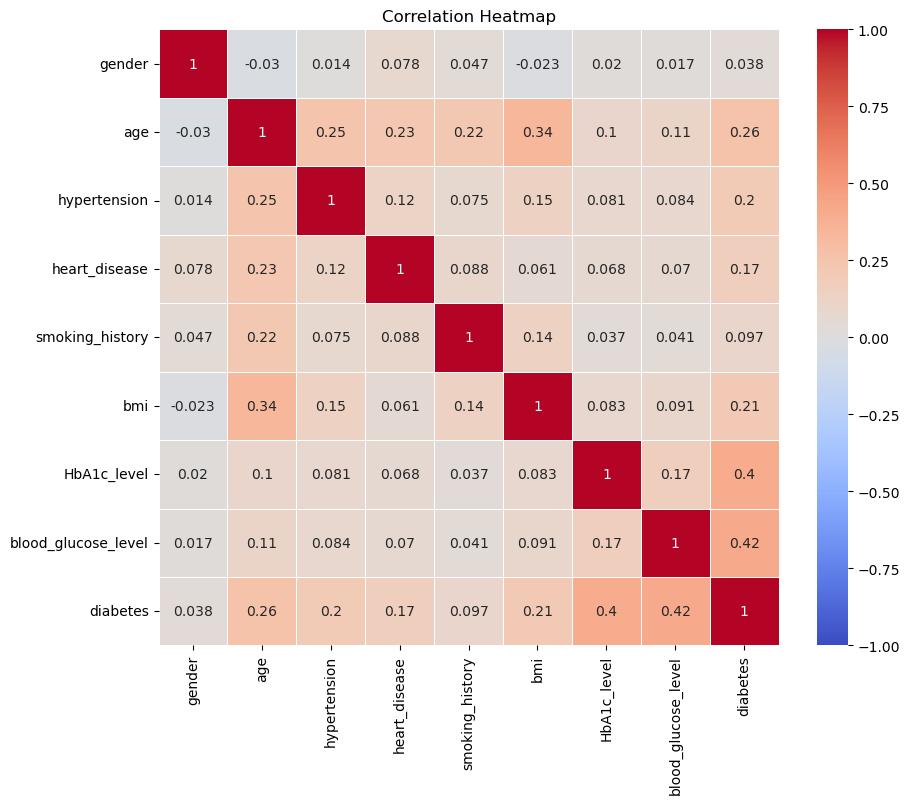

In [22]:
corr_matrix = medical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
X = medical_data.drop(columns = ["diabetes"])
Y = medical_data["diabetes"].values.reshape(-1, 1)

In [24]:
Y.shape

(100000, 1)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=55)

In [26]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [27]:
model.score(X_train, Y_train)

0.9598125

In [28]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [29]:
print(accuracy_score(y_pred, Y_test))

0.96235


In [30]:
print(mean_squared_error(y_pred, Y_test))

0.03765


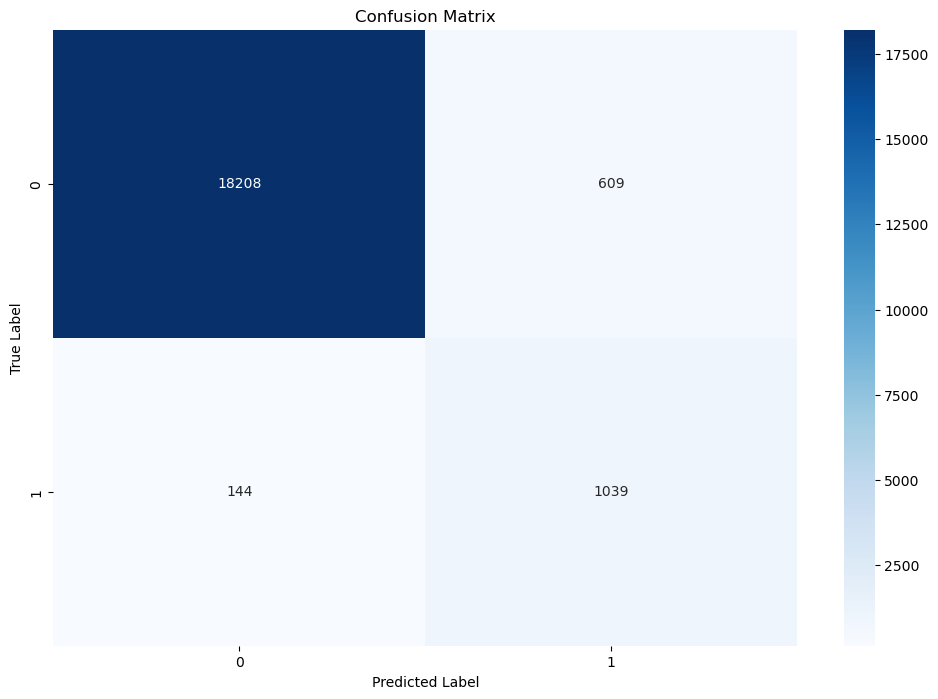

In [31]:
cm = confusion_matrix(y_pred, Y_test)


plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()